# Time Series Project Analysis

The data contains one column that contains timestamps [HH:MM:DD:HR:MIN:SEC] fromat, and Multiple columns with data collected at that specific timestamp

Then we handle the Missing / Abnormal Timestamps, This can lead to inaccuracies.

There are methods to check and impute those missing values. This can be called as Smoothing of the data points.

Plotting / Data Visualization is important to check for the data trend, seasonalities, residues etc. This give us the insight of the patterns present in the data.

We need StatsModel library to decompose the Time Series Data

Statinarity is the point in the time series plotting where the datapoints seems to be in same direction and magnitude.

The Tests for the statinarity comes out to be
    - Augemented Dicky Fuller test [ADF Test]
    - KPSS test [Kwiatkowski Phillips Schmidt Shin] (Gives the statinarity of the Trend line)
    - Phillips Perron test [PP Test]

* Deseasonalizing the Time Series Data ->

        When the Person considers the Seasonalities constant. Its similar to Reverse Approach to find Seasons.

* Auto Correlation of the Time Series Data ->

        Where the current data is correlating with the old data point.

* Lag
* Smooth

## Importing the Libraries

In [1]:
# import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
# Making the Plotly to export the graph in browser due to some issue with vscode
import plotly.io as pio
pio.renderers.default = 'browser'

## Read the Data

In [9]:
# read the Data
df = pd.read_csv("AirPassengers.csv", parse_dates=True)
# print the Data
df.sample(5)

,Month,#Passengers
129,1959-10,407
136,1960-05,472
108,1958-01,340
126,1959-07,548
56,1953-09,237


## Data Pre-Processing

In [10]:
# Change the name of the columns
df.columns = ["Date", "Number_of_Passengers"]
df.sample(5)

,Date,Number_of_Passengers
25,1951-02,150
127,1959-08,559
112,1958-05,363
68,1954-09,259
44,1952-09,209


## Plot the data using the Seaborn library

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143],
 [Text(0, 0, '1949-01'),
  Text(1, 0, '1949-02'),
  Text(2, 0, '1949-03'),
  Text(3, 0, '1949-04'),
 

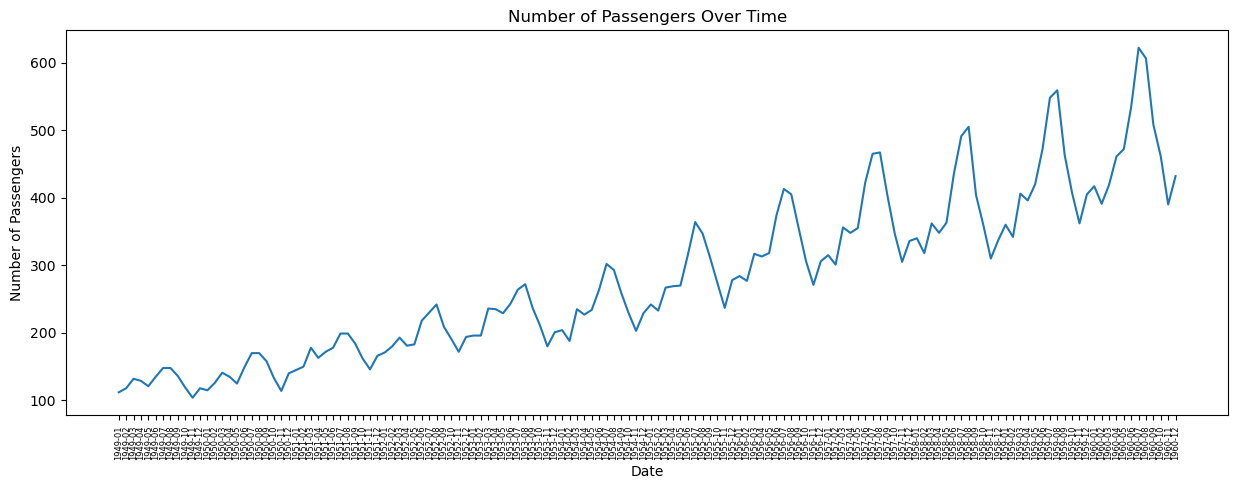

In [11]:
## Change the size of the plot
plt.figure(figsize=(15,5))
# plot the data
sns.lineplot(data= df, y = "Number_of_Passengers", x = "Date")
# set the labels
plt.title('Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
# Rotating the x tips
plt.xticks(rotation=90, fontsize = 6)

In [12]:
# make the same plot using the plotly
import plotly.express as px
fig = px.line(df, x = "Date", y = "Number_of_Passengers", title = "Number of Passengers Over Time")
# Set the Labels of the plotly plot
fig.update_layout(xaxis_title="Date", yaxis_title="Number of Passengers")
fig.update_traces(line_color = "red")
fig.show()

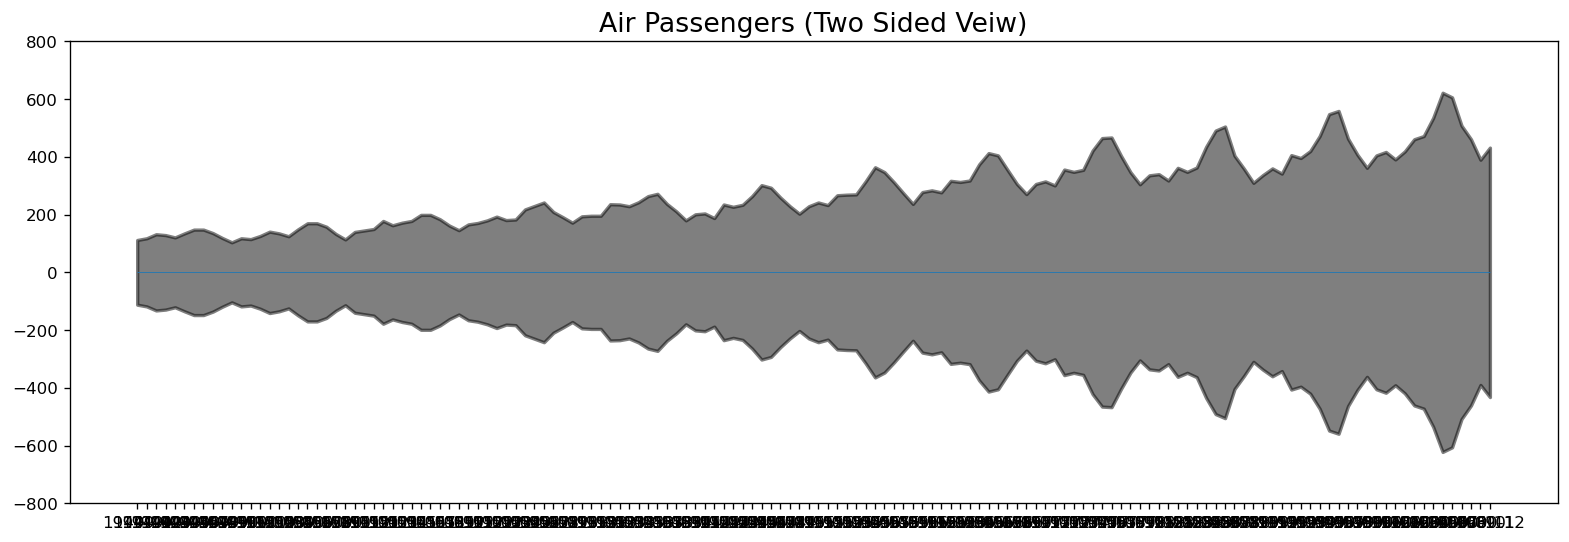

In [13]:
# Make dual y axis plot

x = df['Date'].values
y1 = df['Number_of_Passengers'].values

fig, ax = plt.subplots(1,1,figsize=(16,5), dpi=120)
plt.fill_between(x,y1=y1,y2=-y1,alpha=0.5,color='black',linewidth=2)
plt.ylim(-800,800)
plt.title('Air Passengers (Two Sided Veiw)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

## Decompose the time series data

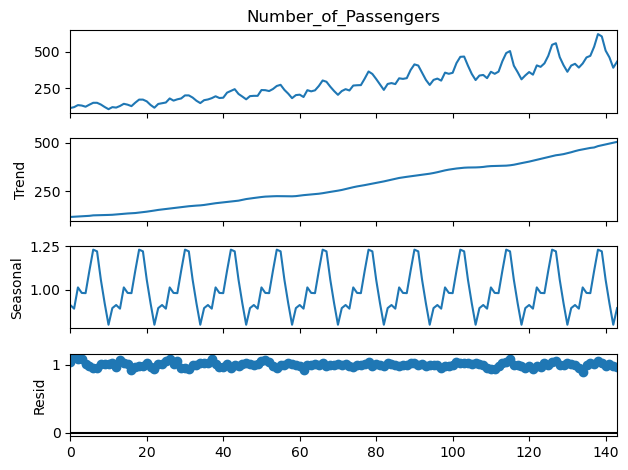

<Figure size 1000x800 with 0 Axes>

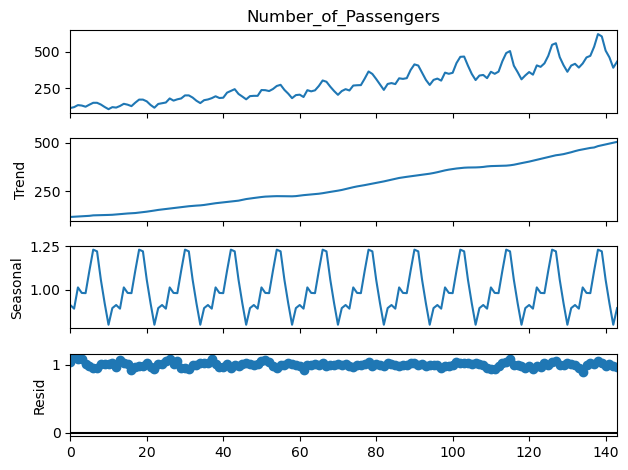

In [14]:
# Decompose the time series
result = seasonal_decompose(df['Number_of_Passengers'], model='multiplicative', extrapolate_trend='freq', period=12)
## Change the Size of the Plot
plt.figure(figsize=(10,8))
result.plot()


With this plot we can observer the Seasonality of the data.